In [21]:
import numpy as np
import pandas as pd
import sklearn 

In [22]:
file_path = '/Users/leduongkhoa/customer_segmentation/dataset/bank+marketing/bank/bank-full.csv'

In [23]:
# Thay đổi đường dẫn đến tập tin CSV nếu cần
data = pd.read_csv(file_path, sep=";")

In [24]:
# Xem 5 dòng đầu tiên của DataFrame
print(data.head())

# Xem thông tin về các cột và kiểu dữ liệu
print(data.info())

# Xem phân phối của biến đầu ra (target)
print(data['y'].value_counts())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [25]:
# Kiểm tra và xử lý giá trị thiếu nếu có
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [26]:
from sklearn.model_selection import train_test_split
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in data.columns:
  if data[column].dtype == object:
    data[column] = le.fit_transform(data[column])

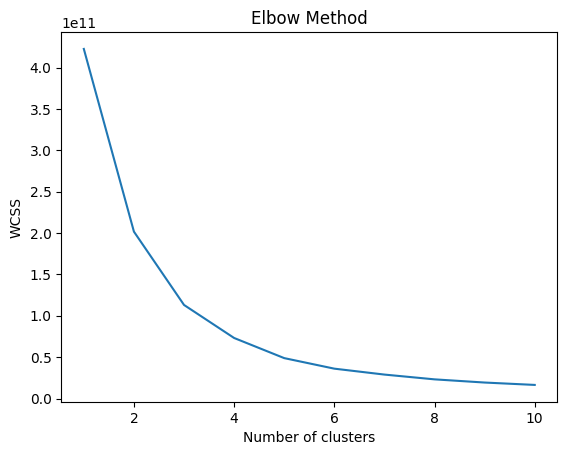

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

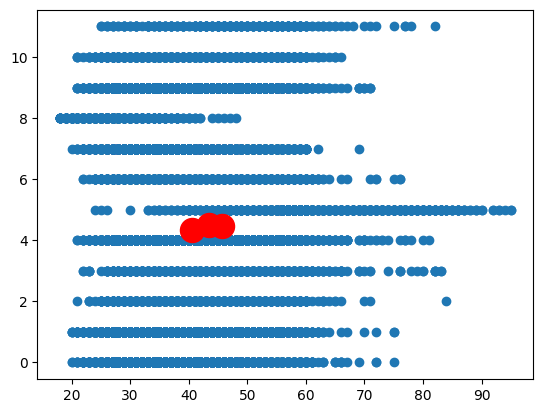

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data)
plt.scatter(data.values[:,0], data.values[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()